<a href="https://colab.research.google.com/github/Ghanifhakbar/GDGOC/blob/main/supervised_learning_ghanif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [667]:
!pip install -q catboost

In [668]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier,Pool
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Load data

In [669]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

train.head(20)

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,Martin,727.0,Spain,Male,38.0,2,62276.99,1,Yes,Yes,59280.79,No,4,DIAMOND,757,0
1,2,Chinweuba,529.0,France,Female,29.0,8,0.00,2,Yes,NaN,19842.11,No,3,SILVER,476,0
2,3,Clapp,589.0,France,Female,50.0,4,0.00,2,No,Yes,182076.97,No,4,PLATINUM,441,0
3,4,Boni,515.0,France,Male,40.0,0,109542.29,1,Yes,Yes,166370.81,No,5,GOLD,312,0
4,5,Jamieson,528.0,Spain,Male,43.0,7,97473.87,2,Yes,Yes,159823.16,No,3,PLATINUM,654,0
5,6,Niu,684.0,Spain,Female,38.0,3,134168.50,3,Yes,No,3966.50,Yes,5,DIAMOND,888,1
6,7,Foley,659.0,Spain,Male,NaN,3,107594.11,2,Yes,Yes,102416.84,No,3,DIAMOND,683,0
7,8,Khan,645.0,France,Male,39.0,8,0.00,2,No,No,96864.36,No,5,SILVER,287,0
8,9,Iweobiegbunam,610.0,Germany,Female,69.0,5,86038.21,3,No,No,192743.06,Yes,1,DIAMOND,613,1
9,10,Hsiung,488.0,Germany,Female,33.0,4,140002.35,1,Yes,No,123613.81,No,1,GOLD,935,0


In [670]:
print(f'Train columns: {train.columns}')
print(f'Test columns: {test.columns}')

Train columns: Index(['ID', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned', 'Exited'],
      dtype='object')
Test columns: Index(['ID', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')


# Exploratory Data Analysis (EDA)

In [671]:
numerical_cols = [var for var in train.columns if train[var].dtype != 'object'] # get the numerical columns
categorical_cols = [var for var in train.columns if train[var].dtype == 'object'] # get the categorical columns


print('Numerical columns:')
print(numerical_cols)

Numerical columns:
['ID', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned', 'Exited']


In [672]:
print('Categorical columns:')
print(categorical_cols)

Categorical columns:
['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']


In [673]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8030 entries, 0 to 8029
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8030 non-null   int64  
 1   Surname             8030 non-null   object 
 2   CreditScore         7603 non-null   float64
 3   Geography           8030 non-null   object 
 4   Gender              7607 non-null   object 
 5   Age                 7588 non-null   float64
 6   Tenure              8030 non-null   int64  
 7   Balance             8030 non-null   float64
 8   NumOfProducts       8030 non-null   int64  
 9   HasCrCard           8030 non-null   object 
 10  IsActiveMember      7628 non-null   object 
 11  EstimatedSalary     7664 non-null   float64
 12  Complain            8030 non-null   object 
 13  Satisfaction Score  8030 non-null   int64  
 14  Card Type           8030 non-null   object 
 15  Point Earned        8030 non-null   int64  
 16  Exited

In [674]:
# Convert 'Geography' and 'Gender' to object type
train['Geography'] = train['Geography'].astype('object')
train['Gender'] = train['Gender'].astype('object')

test['Geography'] = test['Geography'].astype('object')
test['Gender'] = test['Gender'].astype('object')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8030 entries, 0 to 8029
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8030 non-null   int64  
 1   Surname             8030 non-null   object 
 2   CreditScore         7603 non-null   float64
 3   Geography           8030 non-null   object 
 4   Gender              7607 non-null   object 
 5   Age                 7588 non-null   float64
 6   Tenure              8030 non-null   int64  
 7   Balance             8030 non-null   float64
 8   NumOfProducts       8030 non-null   int64  
 9   HasCrCard           8030 non-null   object 
 10  IsActiveMember      7628 non-null   object 
 11  EstimatedSalary     7664 non-null   float64
 12  Complain            8030 non-null   object 
 13  Satisfaction Score  8030 non-null   int64  
 14  Card Type           8030 non-null   object 
 15  Point Earned        8030 non-null   int64  
 16  Exited

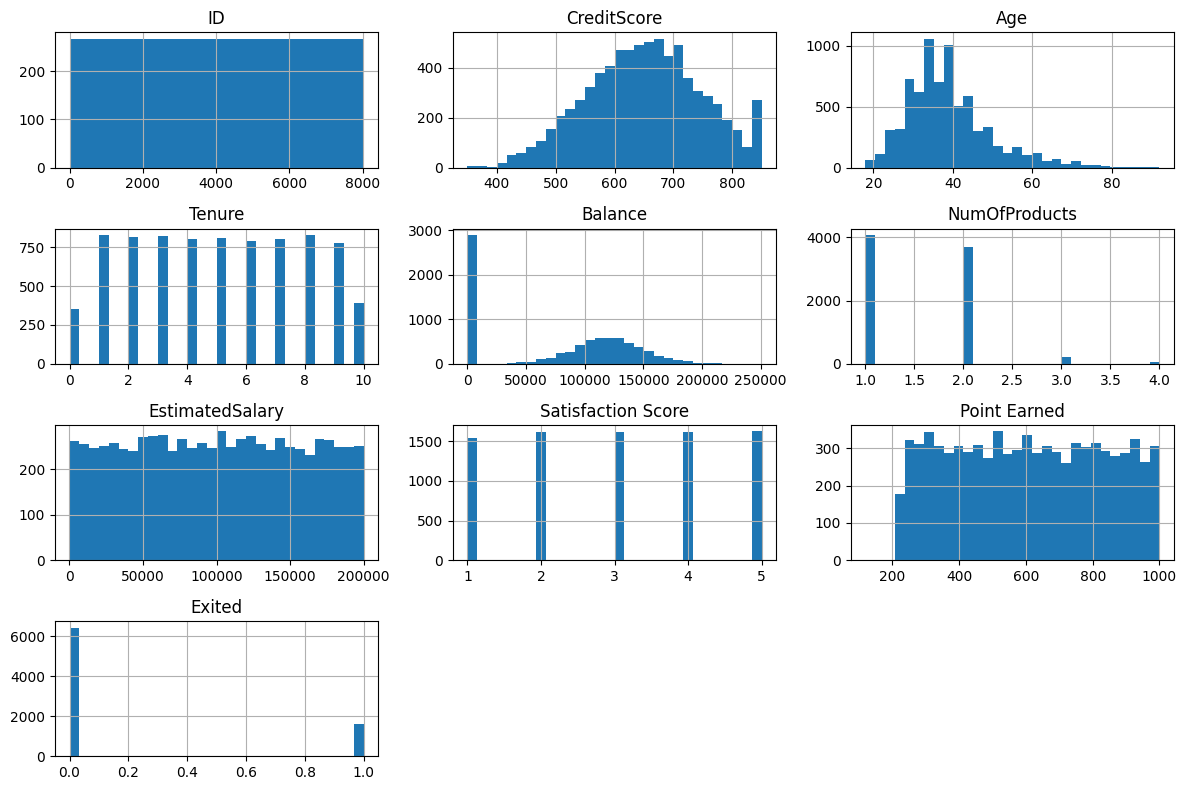

In [675]:
train[numerical_cols].hist(bins=30, figsize=(12,8));
plt.tight_layout()
plt.show()

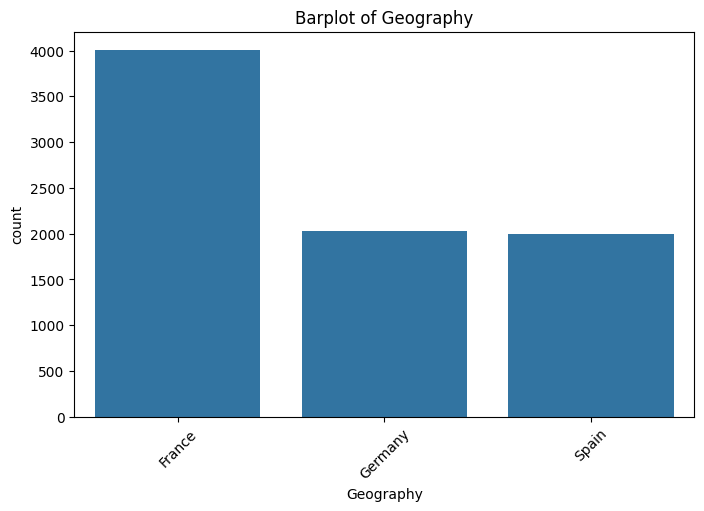

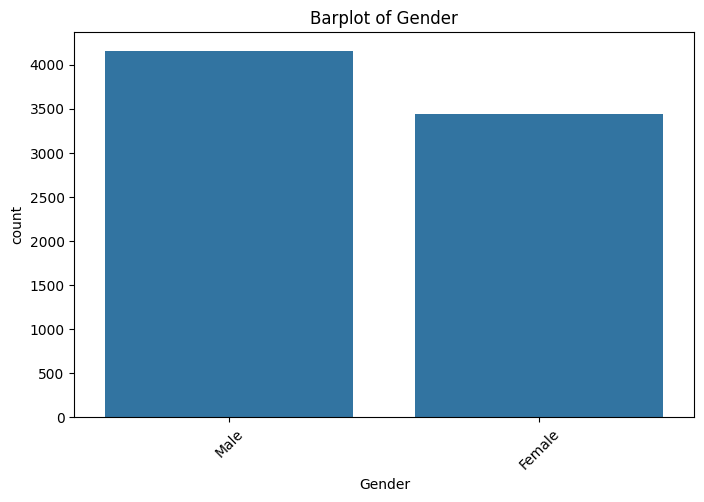

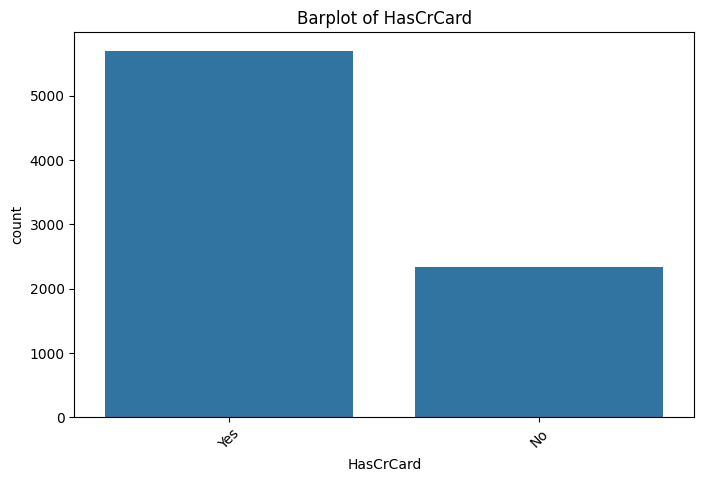

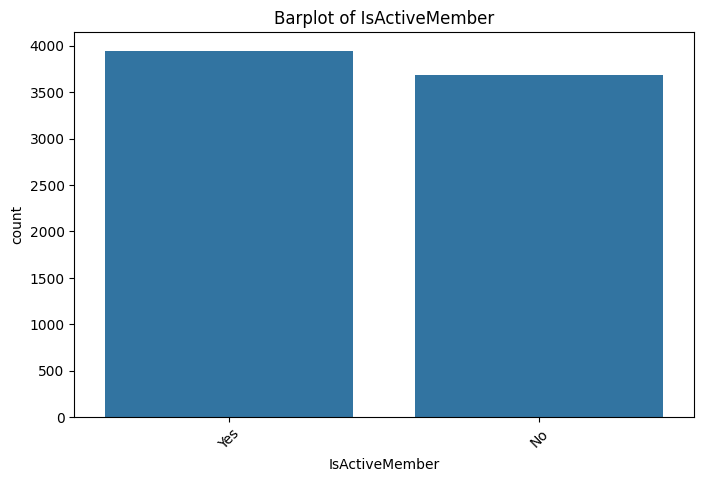

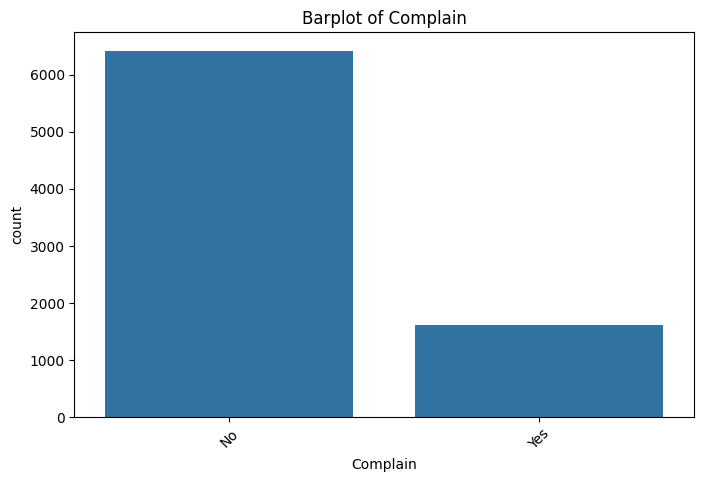

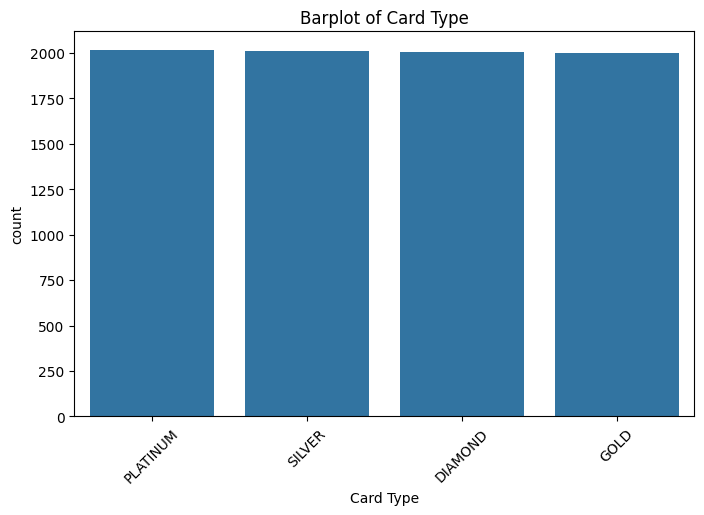

In [676]:
# Removing 'Surname' from categorical_cols
k = 'Surname'

while(k in categorical_cols):
    categorical_cols.remove(k)

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train, x=col, order=train[col].value_counts().index)
    plt.title(f'Barplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

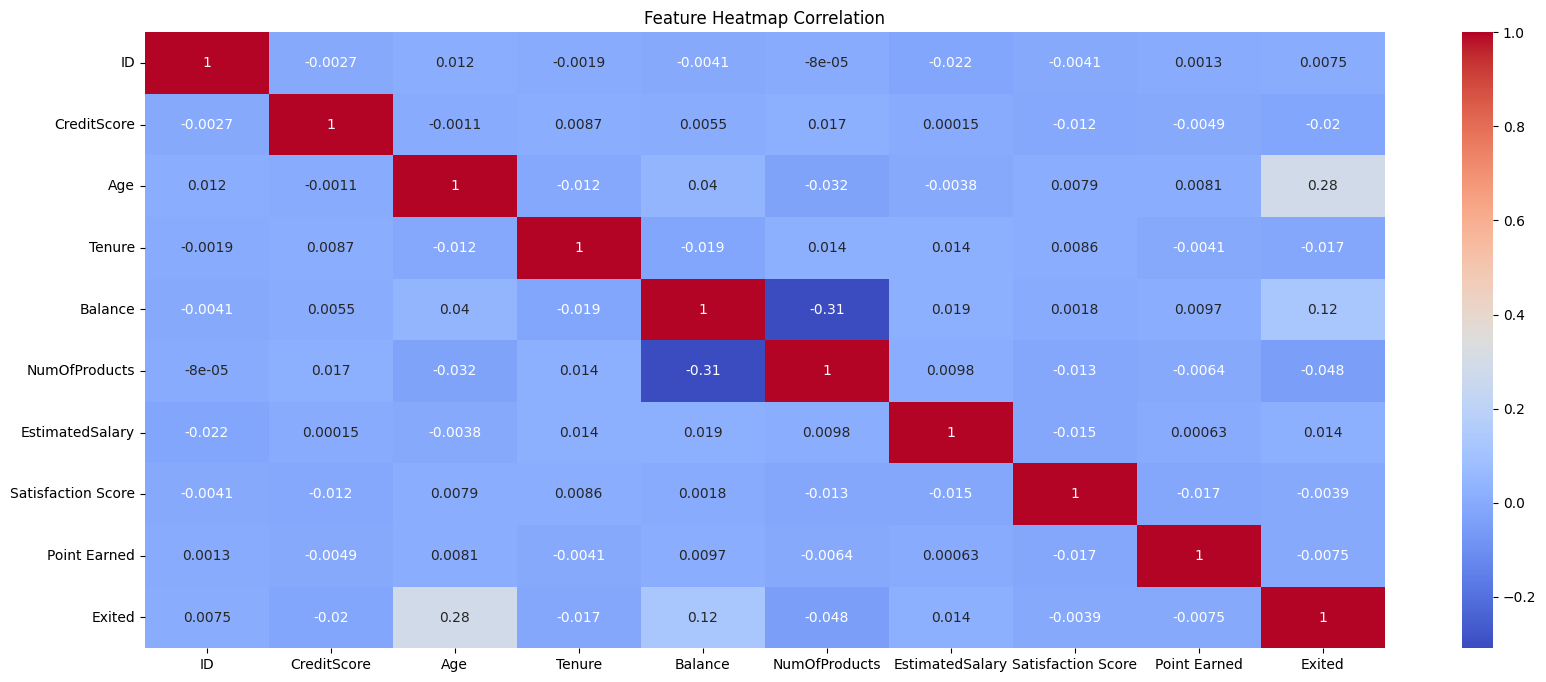

In [677]:
train2 = train.copy()
num_corr = train2.drop('Surname', axis=1).select_dtypes(include=np.number).corr()
# The line above is changed to select only numerical columns before calculating correlation.

plt.figure(figsize=(20,8))
sns.heatmap(num_corr, annot=True, cmap='coolwarm')
plt.title('Feature Heatmap Correlation')
plt.show()

In [678]:
# Frekuensi fitur kategorikal
for col in ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']:
    print(train[col].value_counts())

Geography
France     4006
Germany    2027
Spain      1997
Name: count, dtype: int64
Gender
Male      4162
Female    3445
Name: count, dtype: int64
HasCrCard
Yes    5700
No     2330
Name: count, dtype: int64
IsActiveMember
Yes    3948
No     3680
Name: count, dtype: int64
Complain
No     6422
Yes    1608
Name: count, dtype: int64
Card Type
PLATINUM    2017
SILVER      2010
DIAMOND     2003
GOLD        2000
Name: count, dtype: int64


# Feature Engineering & Data Preprocessing

In [679]:
# Drop irrelevant columns
train.drop(columns=["ID", "Surname"], inplace=True)
test.drop(columns=["ID", "Surname"], inplace=True)
train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,727.0,Spain,Male,38.0,2,62276.99,1,Yes,Yes,59280.79,No,4,DIAMOND,757,0
1,529.0,France,Female,29.0,8,0.00,2,Yes,NaN,19842.11,No,3,SILVER,476,0
2,589.0,France,Female,50.0,4,0.00,2,No,Yes,182076.97,No,4,PLATINUM,441,0
3,515.0,France,Male,40.0,0,109542.29,1,Yes,Yes,166370.81,No,5,GOLD,312,0
4,528.0,Spain,Male,43.0,7,97473.87,2,Yes,Yes,159823.16,No,3,PLATINUM,654,0


In [680]:
print(train.isnull().sum())

CreditScore           427
Geography               0
Gender                423
Age                   442
Tenure                  0
Balance                 0
NumOfProducts           0
HasCrCard               0
IsActiveMember        402
EstimatedSalary       366
Complain                0
Satisfaction Score      0
Card Type               0
Point Earned            0
Exited                  0
dtype: int64


In [681]:
print(test.isnull().sum())

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [682]:
# handling missng value
train['Age'] = train['Age'].fillna(train['Age'].median())
train['CreditScore'] = train['CreditScore'].fillna(train['CreditScore'].mean())
train['EstimatedSalary'] = train['EstimatedSalary'].fillna(train['EstimatedSalary'].mean())
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['IsActiveMember'] = train['IsActiveMember'].fillna(train['IsActiveMember'].mode()[0])

In [683]:
print(train.isnull().sum())

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
Exited                0
dtype: int64


In [684]:
from sklearn.preprocessing import LabelEncoder

cat_features = ["Geography", "Gender", "HasCrCard", "IsActiveMember", "Complain", "Card Type"]

# Create a LabelEncoder object
label_encoders = {}
for col in cat_features:
    label_encoders[col] = LabelEncoder()

# Fit and transform the categorical features in the training set
for col in cat_features:
    train[col] = label_encoders[col].fit_transform(train[col])


# Transform the categorical features in the test set using the same encoders
for col in cat_features:
    test[col] = label_encoders[col].transform(test[col])


In [685]:
# Create new feature combining 'Complain' and 'Satisfaction Score'
train["Complain_Score"] = train["Complain"] * train["Satisfaction Score"]
test["Complain_Score"] = test["Complain"] * test["Satisfaction Score"]

# Create new feature as the ratio of 'Complain' to 'EstimatedSalary'
train["Complain_Ratio"] = train["Complain"] / (train["EstimatedSalary"] + 1)  # Add 1 to avoid division by zero
test["Complain_Ratio"] = test["Complain"] / (test["EstimatedSalary"] + 1)  # Add 1 to avoid division by zero

In [686]:
train.drop(columns=["Complain"], inplace=True)
test.drop(columns=["Complain"], inplace=True)

In [687]:
# Split numerical and categorical features
# Assuming 'train' contains your data
X = train.drop('Exited', axis=1)  # Assuming 'Exited' is your target variable
y = train['Exited']

# Split numerical and categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [688]:
# Split into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=111)

# Create CatBoost Pool for categorical features
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_val, y_val, cat_features=categorical_features)

In [689]:
# Create and train CatBoostClassifier
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=4,
    eval_metric='AUC',
    random_seed=111,
    verbose=100,
    early_stopping_rounds=32
)

model.fit(train_pool, eval_set=test_pool, verbose=True)

0:	test: 0.9992809	best: 0.9992809 (0)	total: 4.62ms	remaining: 458ms
1:	test: 0.9992096	best: 0.9992809 (0)	total: 11.1ms	remaining: 544ms
2:	test: 0.9992458	best: 0.9992809 (0)	total: 16.8ms	remaining: 544ms
3:	test: 0.9991696	best: 0.9992809 (0)	total: 21.9ms	remaining: 524ms
4:	test: 0.9991708	best: 0.9992809 (0)	total: 26.8ms	remaining: 509ms
5:	test: 0.9991458	best: 0.9992809 (0)	total: 31.9ms	remaining: 500ms
6:	test: 0.9991245	best: 0.9992809 (0)	total: 37.2ms	remaining: 494ms
7:	test: 0.9991595	best: 0.9992809 (0)	total: 42.2ms	remaining: 485ms
8:	test: 0.9991595	best: 0.9992809 (0)	total: 47.5ms	remaining: 480ms
9:	test: 0.9991696	best: 0.9992809 (0)	total: 52.7ms	remaining: 474ms
10:	test: 0.9991595	best: 0.9992809 (0)	total: 58ms	remaining: 469ms
11:	test: 0.9991520	best: 0.9992809 (0)	total: 63.2ms	remaining: 463ms
12:	test: 0.9991445	best: 0.9992809 (0)	total: 68.4ms	remaining: 457ms
13:	test: 0.9991370	best: 0.9992809 (0)	total: 73.4ms	remaining: 451ms
14:	test: 0.999199

Accuracy: 0.9988
Precision: 0.9935
Recall: 1.0000
F1-Score: 0.9968
ROC-AUC: 0.9996

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1298
           1       0.99      1.00      1.00       308

    accuracy                           1.00      1606
   macro avg       1.00      1.00      1.00      1606
weighted avg       1.00      1.00      1.00      1606



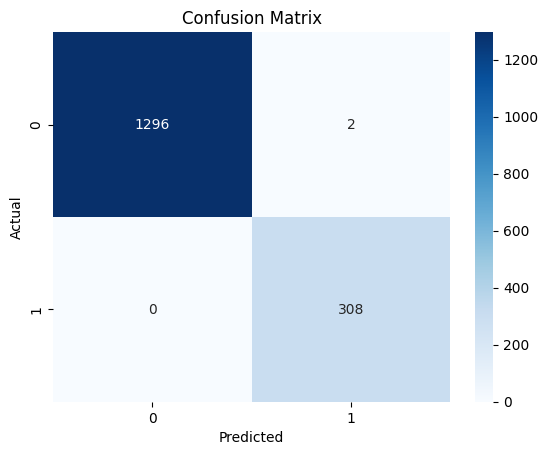

In [690]:
# Predict on validation set
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]

# Evaluate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [691]:
# Predict on test data
test_predictions = model.predict(test)

# Add predictions to test data
test["Exited"] = test_predictions
print(test[["Exited"]])

      Exited
0          1
1          0
2          0
3          0
4          0
...      ...
1995       1
1996       0
1997       0
1998       0
1999       0

[2000 rows x 1 columns]


               Feature  Importance (%)
13      Complain_Score       73.594334
14      Complain_Ratio       22.181308
3                  Age        1.380317
6        NumOfProducts        0.681898
12        Point Earned        0.420175
9      EstimatedSalary        0.400004
5              Balance        0.314268
10  Satisfaction Score        0.287961
4               Tenure        0.248540
1            Geography        0.148522
11           Card Type        0.134545
0          CreditScore        0.133309
7            HasCrCard        0.060430
8       IsActiveMember        0.008956
2               Gender        0.005434


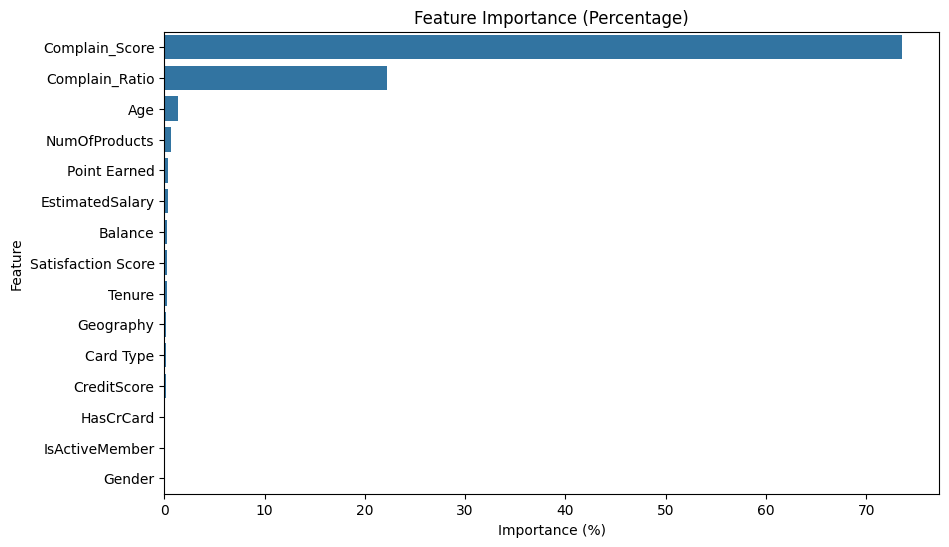

In [692]:
# Feature importance
feature_importance = model.get_feature_importance()
feature_names = X_train.columns

# Convert feature importance to percentages
total_importance = sum(feature_importance)  # Total importance
importance_percentage = (feature_importance / total_importance) * 100  # Convert to percentage

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({"Feature": feature_names, "Importance (%)": importance_percentage})
importance_df = importance_df.sort_values(by="Importance (%)", ascending=False)

# Display the top features with their percentages
print(importance_df)

# Plot feature importance as percentages
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance (%)", y="Feature", data=importance_df)
plt.title("Feature Importance (Percentage)")
plt.xlabel("Importance (%)")
plt.ylabel("Feature")
plt.show()

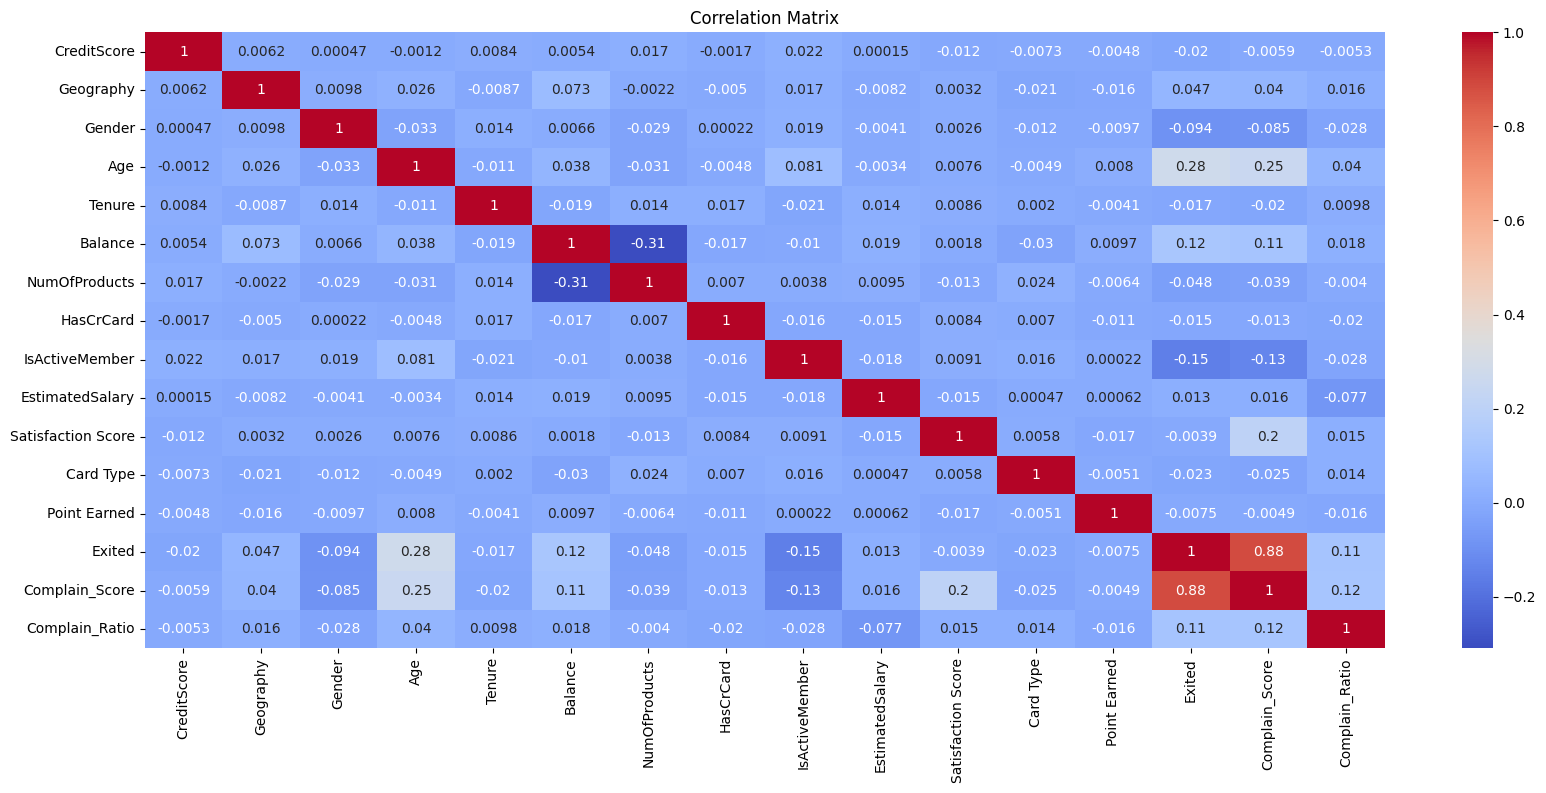

In [693]:
import seaborn as sns
plt.figure(figsize=(20, 8))
sns.heatmap(train.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [694]:
train.head(10
           )

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned,Exited,Complain_Score,Complain_Ratio
0,727.0,2,1,38.0,2,62276.99,1,1,1,59280.79,4,0,757,0,0,0.000000
1,529.0,0,0,29.0,8,0.00,2,1,1,19842.11,3,3,476,0,0,0.000000
2,589.0,0,0,50.0,4,0.00,2,0,1,182076.97,4,2,441,0,0,0.000000
3,515.0,0,1,40.0,0,109542.29,1,1,1,166370.81,5,1,312,0,0,0.000000
4,528.0,2,1,43.0,7,97473.87,2,1,1,159823.16,3,2,654,0,0,0.000000
5,684.0,2,0,38.0,3,134168.50,3,1,0,3966.50,5,0,888,1,5,0.000252
6,659.0,2,1,37.0,3,107594.11,2,1,1,102416.84,3,0,683,0,0,0.000000
7,645.0,0,1,39.0,8,0.00,2,0,0,96864.36,5,3,287,0,0,0.000000
8,610.0,1,0,69.0,5,86038.21,3,0,0,192743.06,1,0,613,1,1,0.000005
9,488.0,1,0,33.0,4,140002.35,1,1,0,123613.81,1,1,935,0,0,0.000000


In [695]:
submission = pd.read_csv('/content/sample_submission.csv')
submission['Exited'] = test['Exited']

submission

,ID,Exited
0,2001,1
1,2002,0
2,2003,0
3,2004,0
4,2005,0
...,...,...
1995,3996,1
1996,3997,0
1997,3998,0
1998,3999,0


In [696]:
submission.to_csv('my_first_submission.csv', index=False) # save the submission file to CSV

MODEL :CatBoostClassifier, algoritma gradient boosting yang menangani fitur kategorikal secara otomatis, tahan terhadap overfitting, dan memiliki kinerja tinggi, untuk memprediksi Exited. memuat data, melakukan EDA, melakukan rekayasa fitur dan pra-pemrosesan data, melatih model, mengevaluasinya dengan metrik seperti akurasi dan skor F1, dan akhirnya membuat prediksi pada data uji.

INTERPRETASI HASIL: Model klasifikasi menunjukkan performa yang sangat baik dengan metrik akurasi, presisi, recall, F1-Score, dan AUC-ROC yang mendekati sempurna. Namun, nilai feature importance yang didominasi oleh Complain_Score dan Complain_Ratio menimbulkan kecurigaan kuat adanya data leakage dan overfitting.